**UNIVERSIDADE FEDERAL DA PARAÍBA** \
**CENTRO DE CIÊNCIAS SOCIAIS APLICADAS**\
**CIÊNCIA DE DADOS PARA NEGÓCIOS** \
**ALUNOS: Nercino Neto e Tainá Diniz**


# **Hackathon Finanças**

## **1. Descrição**

## **2. Importando Bibliotecas**

## **3. Obtendo Dados de Tickets B3**

- 3.1 Estabelecendo um período de cinco anos

- 3.2 Definindo Tickers de Ativos com Base no Índice Brasil 100

- 3.3 Obtendo infomações sobre os Tickets

## **4. Aplicando Método de Markowitz**

- 4.1 Criando DataFrame de Variação

- 4.2 Instanciando Class Portfolio

- 4.3 Definindo Métodos de Retornos Históricos

- 4.4 Calculando Método de Otimização

- 4.5 Configurações para Modelo Clássico de Markowitz

- 4.6 Criando a Carteira de Investimentos

## **5. Rebalanceamento de Carteira**

- 5.1 Selecionando Os Cinco Principais Tickers

- 5.2 Criando o DataFrame de Variação Com os Cinco Principais Tickers

- 5.3 Atualizando a Instância De Portfolio

- 5.4 Recalculando o Método de Otimização

- 5.5 Atualizando a Carteira de Investimentos

- 5.6 Calculando a Eficiência da Fronteira

## **6. Gráficos**

- 6.1 Composição Da Carteira de Investimento

- 6.2 Eficiência Da Fronteira

- 6.3 Medidas de Risco

## **7. Backtesting**

- 7.1 Normalizando Os Dados

- 7.2  Comprando As Ações

- 7.3 Colunas De Valores Diarios

- 7.4 ROI Da Carteira

- 7.5 Retorno Médio Diario

# **8. Conclusão**

## **1. Descrição**

Neste projeto, visando a construção de uma carteira de investimentos, aplicamos o método de Markowitz para otimizar a alocação de ativos, priorizando a maximização do Índice de Sharpe, um indicador crucial que leva em conta o desempenho ajustado ao risco. Através desta simulação, buscamos criar uma carteira de investimentos na Bolsa Brasileira B3, iniciando com os portfólios de maior volume de acordo com o Índice Brasil 100 (IBrX 100 B3). No exemplo apresentado, distribuímos pesos por meio do modelo de otimização de Markowitz, conduzindo uma análise de cinco anos para avaliar o desempenho.


## **2. Importando Bibliotecas**


In [ ]:
from datetime import datetime
from pathlib import Path
from IPython import display



def clear():
    display.clear_output(wait=True)
    display.clear_output()

try:
    import pandas as pd
except:
    print('Instalando Pandas...')
    !pip install pandas
    import pandas as pd
    clear()


try:
    from pandas_datareader import data as web
except:
    print('Instalando Pandas DataReader...')
    !pip install --upgrade pandas_datareader
    from pandas_datareader import data as web
    clear()


try:
    import yfinance as yf
except:
    print('Instalando Yahoo Finance...')
    !pip install yfinance
    import yfinance as yf
    clear()
finally:
    yf.pdr_override() # Evitar TypeErrors recentes da  biblioteca


try:
    import matplotlib.pyplot as plt
except:
    print('Instalando Matplotlib...')
    !pip install matplotlib
    import matplotlib.pyplot as plt
    clear()


try:
    from matplotlib import pyplot as plt
except:
    print('Instalando Matplotlib...')
    !pip install matplotlib
    from matplotlib import pyplot as plt
    clear()


try:
    import riskfolio as rp
except:
    print('Instalando Riskfolio...')
    !pip install riskfolio-lib
    import riskfolio as rp
    clear()

## **3. Obtendo Dados de Tickets B3**

- 3.1 Estabelecendo um período de cinco anos.

In [ ]:
data_inicial = datetime.strptime('2018-08-21', '%Y-%m-%d')

data_final = datetime.strptime('2023-08-21', '%Y-%m-%d')

- 3.2 Definindo Tickets de Ativos com Base no Índice Brasil 100

In [ ]:
tickers_ibrx_100_b3 = [
    'RRRP3', 'ALSO3', 'ALPA4', 'ABEV3', 'ARZZ3', 'ASAI3', 'AURE3', 'AZUL4', 'B3SA3', 'BBSE3',
    'BBDC3', 'BBDC4', 'BRAP4', 'BBAS3', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3', 'BHIA3', 'CBAV3',
    'CCRO3', 'CMIG4', 'CIEL3', 'COGN3', 'CSMG3', 'CPLE6', 'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3',
    'CYRE3', 'DXCO3', 'DIRR3', 'ECOR3', 'ELET3', 'ELET6', 'EMBR3', 'ENGI11', 'ENEV3', 'EGIE3',
    'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'GMAT3', 'NTCO3', 'SOMA3', 'HAPV3',
    'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'RENT3', 'LWSA3', 'LREN3',
    'MDIA3', 'MGLU3', 'MRFG3', 'CASH3', 'BEEF3', 'MOVI3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3',
    'PETR4', 'RECV3', 'PRIO3', 'PETZ3', 'PSSA3', 'RADL3', 'RAIZ4', 'RDOR3', 'RAIL3', 'SBSP3',
    'SANB11', 'STBP3', 'SMTO3', 'CSNA3', 'SIMH3', 'SLCE3', 'SUZB3', 'TAEE11', 'VIVT3', 'TIMS3',
    'TOTS3', 'TRPL4', 'UGPA3', 'USIM5', 'VALE3', 'VAMO3', 'VBBR3', 'VIVA3', 'WEGE3', 'YDUQ3'
]

# Deixando no padrão Yahoo
tickers_yahoo = [ticker + '.SA' for ticker in tickers_ibrx_100_b3]

- 3.3 Obtendo infomações sobre os Tickets

In [ ]:
dados_tickers = web.get_data_yahoo(tickers_yahoo, start=data_inicial, end=data_final)

[*********************100%%**********************]  100 of 100 completed


## **4. Aplicando Método de Markowitz**

- 4.1 Criando DataFrame de Variação

In [ ]:
variacao_df = dados_tickers['Adj Close'].pct_change().dropna()

In [ ]:
variacao_df.head()

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-29,0.034600,0.031094,0.036292,0.021300,-0.001232,0.012195,0.027946,0.029821,0.004291,0.012555,...,-0.011563,0.012363,0.016417,-0.008601,0.042320,-0.000819,0.046777,-0.004695,0.010417,0.003790
2022-03-30,-0.005246,-0.020477,-0.016878,-0.018002,-0.003083,-0.040964,-0.042553,0.008365,-0.005981,-0.004313,...,-0.002264,-0.012890,0.007725,0.014283,-0.015789,-0.029086,-0.032020,0.004717,0.005891,0.034450
2022-03-31,0.015161,-0.009122,-0.006867,0.008048,0.007421,0.004397,-0.015638,0.002553,-0.005731,-0.010829,...,0.000000,-0.027491,-0.026481,-0.002816,-0.022918,-0.013502,0.006543,0.008263,0.021084,-0.044708
2022-04-01,-0.000649,0.046414,0.033276,0.039255,0.011664,0.006254,0.031773,0.021006,-0.000576,-0.006568,...,0.000000,0.033922,-0.014316,0.014226,0.030493,0.028657,0.020585,0.018477,0.014626,0.048711
2022-04-04,-0.012995,-0.003299,-0.004601,0.002988,-0.011529,-0.007458,0.006483,0.006234,-0.009227,-0.003461,...,0.008699,-0.017772,0.019608,0.010107,0.000000,-0.002911,0.016985,-0.010820,-0.010175,-0.003188


- 4.2 Instanciando Class Portfolio

In [ ]:
portfolio = rp.Portfolio(returns = variacao_df)

- 4.3 Definindo Métodos de Retornos Históricos

In [ ]:
metodo_mu = 'hist'  # define o método de retornos histórico para calcular o retorno esperado

metodo_cov = 'hist' # define o método de retornos histórico para calcular a matriz de covariância

- 4.4 Calculando Método de Otimização

In [ ]:
portfolio.assets_stats(method_mu = metodo_mu, method_cov = metodo_cov, d = 0.94)

- 4.5 Configurações para Modelo Clássico de Markowitz

In [ ]:
model='Classic' # Modelo clássico de Markowitz
rm = 'MV' # Medida de risco: mean-variance
obj = 'Sharpe' # Função objetivo: Maximizar Shape

- 4.6 Criando a Carteira de Investimentos

In [ ]:
carteira = portfolio.optimization(model = model, rm = rm, obj = obj)

## **5. Rebalanceamento De Carteira**

- 5.1 Selecionando Os Cinco Principais Tickers

In [ ]:
top_5_tickers = carteira.sort_values(by='weights', ascending=False).head(5)
top_5_tickers

,weights
PETR4.SA,0.242476
BBSE3.SA,0.226592
MDIA3.SA,0.161702
PRIO3.SA,0.102136
PSSA3.SA,0.079890


- 5.2 Criando DataFrame de Variação Com os Cinco Principais Tickers

In [ ]:
variacao_df_top_5_tickers = variacao_df[top_5_tickers.index.tolist()]
variacao_df_top_5_tickers

,PETR4.SA,BBSE3.SA,MDIA3.SA,PRIO3.SA,PSSA3.SA
Date,,,,,
2022-03-29,0.022152,0.008540,0.057530,0.008390,0.020154
2022-03-30,0.021362,0.004032,-0.020000,-0.006339,-0.001411
2022-03-31,0.013944,0.026506,0.004898,-0.050638,-0.005652
2022-04-01,-0.013154,0.013693,0.009748,0.028559,0.010161
2022-04-04,-0.009391,-0.004245,0.023331,-0.005308,-0.003348
...,...,...,...,...,...
2023-08-14,0.002618,0.009239,-0.047300,0.004756,-0.019435
2023-08-15,0.007180,-0.006713,0.004844,-0.036427,-0.014775
2023-08-16,0.022035,-0.000307,-0.013979,-0.017941,-0.013533


- 5.3 Atualizando Instância De Portfolio

In [ ]:
portfolio = rp.Portfolio(returns = variacao_df_top_5_tickers)

- 5.4 Recalculando Método de Otimização

In [ ]:
portfolio.assets_stats(method_mu = metodo_mu, method_cov = metodo_cov, d = 0.94)

- 5.5 Atualizando a Carteira de Investimentos

In [ ]:
carteira = portfolio.optimization(model = model, rm = rm, obj = obj)

- 5.6 Calculando a Eficiência da Fronteira

In [ ]:
pontos = 50 # Número de pontos da fronteira

fronteira = portfolio.efficient_frontier(model=model, rm=rm, points=pontos)

fronteira.T.head()

,PETR4.SA,BBSE3.SA,MDIA3.SA,PRIO3.SA,PSSA3.SA
0,0.119947,0.478606,0.110901,0.069962,0.220584
1,0.186371,0.381589,0.146550,0.097250,0.188240
2,0.214365,0.340701,0.161580,0.108745,0.174609
3,0.236175,0.308858,0.173281,0.117704,0.163982
4,0.254835,0.281633,0.183289,0.125370,0.154873


## **6. Gráficos**

- 6.1 Composição Da Carteira de Investimento

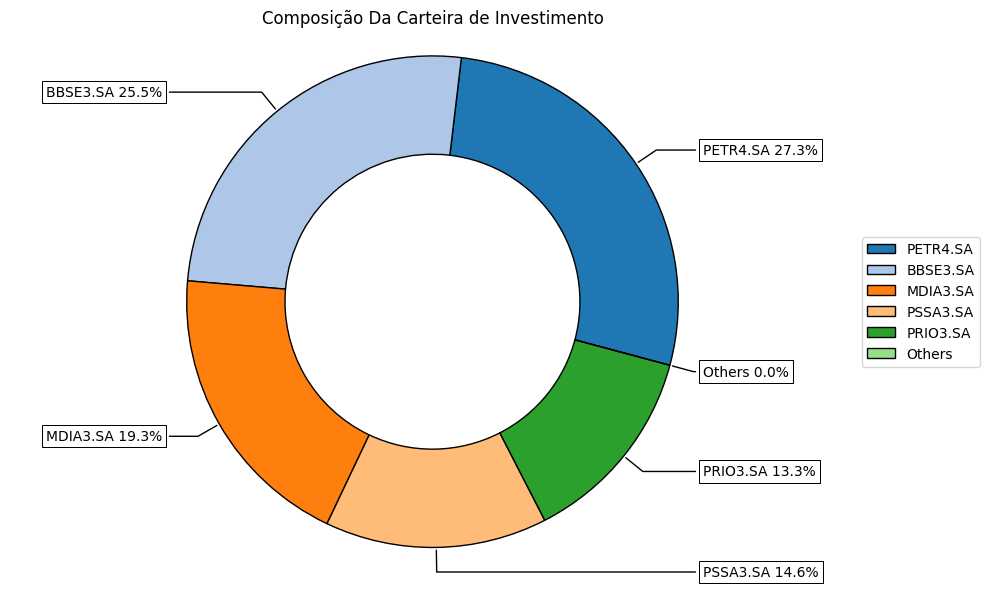

In [ ]:
plot_composicao_carteira = rp.plot_pie(w = carteira, title = 'Composição Da Carteira de Investimento', others=0.05, nrow=25, cmap = "tab20",
                 height = 6, width = 10, ax = None)

- 6.2 Eficiência Da Fronteira

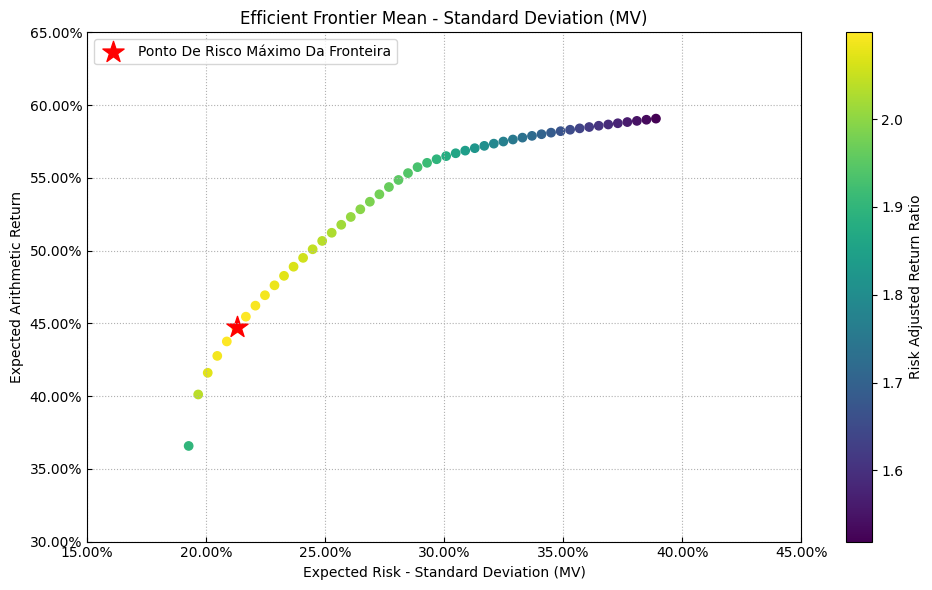

In [ ]:
ponto_rebalanceamento  = 'Ponto De Risco Máximo Da Fronteira'
retorno_esperado = portfolio.mu
covariancia_matrix = portfolio.cov
retornos = portfolio.returns

plot_eficiencia_fronteira = rp.plot_frontier(w_frontier=fronteira, mu=retorno_esperado, cov=covariancia_matrix, returns=retornos, rm=rm,
                      alpha=0.05, cmap='viridis', w=carteira, label=ponto_rebalanceamento,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

- 6.3 Medidas de Risco

  - MV  : Desvio padrão.
  - MAD :Desvio médio absoluto.
  - MSV : Desvio Semi-Padrão.
  - FLPM: Ômega Ratio.
  - SLPM: Sortino Ratio.
  - CVaR: Valor Condicional em Risco.
  - EVaR: Entropic Value at Risk.
  - WR  : Valor Entrópico em Risco.
  - MDD : Calmar Ratio.
  - ADD :  Average Drawdown of uncompounded cumulative returns.
  - CDaR: Conditional Drawdown at Risk of uncompounded cumulative returns.
  - EDaR: Entropic Drawdown at Risk of uncompounded cumulative returns.
  - UCI : Ulcer Index of uncompounded cumulative returns.

In [ ]:
medidas_risco = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
                 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']


carteira_multipla = pd.DataFrame([])

for medidas in medidas_risco:
    carteira_cache = portfolio.optimization(model=model, rm=medidas, obj=obj)
    carteira_multipla = pd.concat([carteira_multipla, carteira_cache], axis=1)

carteira_multipla.columns = medidas_risco

carteira_multipla.style.format("{:.5%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
PETR4.SA,27.28913%,23.46139%,27.63376%,26.42609%,27.73414%,34.04922%,26.73597%,24.93163%,37.16163%,23.86962%,34.44127%,25.08528%,34.34865%
BBSE3.SA,25.52257%,23.85739%,25.61229%,20.91135%,25.66740%,27.58841%,36.95828%,38.34602%,62.83837%,53.08629%,65.55873%,58.59704%,65.65135%
MDIA3.SA,19.29852%,28.48711%,18.18789%,27.50837%,17.50576%,14.30670%,9.13799%,11.37985%,0.00000%,15.77099%,0.00000%,14.20276%,0.00000%
PRIO3.SA,13.27906%,7.73033%,10.97174%,6.20243%,10.99524%,8.90723%,17.83620%,19.37071%,0.00000%,3.61435%,0.00000%,0.58625%,0.00000%
PSSA3.SA,14.61072%,16.46378%,17.59432%,18.95176%,18.09746%,15.14845%,9.33156%,5.97179%,0.00000%,3.65876%,0.00000%,1.52867%,0.00000%


## **7. Backtesting**

- 7.1 Normalizando Os Dados

In [ ]:
dados_tickers_adj = dados_tickers['Adj Close'][top_5_tickers.index.tolist()]

df_normalizado = dados_tickers_adj/dados_tickers_adj.iloc[0,:]
df_normalizado

,PETR4.SA,BBSE3.SA,MDIA3.SA,PRIO3.SA,PSSA3.SA
Date,,,,,
2018-08-21,1.000000,1.000000,1.000000,1.000000,1.000000
2018-08-22,1.035553,0.992117,0.995544,1.039952,1.001236
2018-08-23,1.012980,0.952700,1.008442,1.040557,0.971035
2018-08-24,1.032731,0.953094,1.003752,1.041041,0.969622
2018-08-27,1.055869,0.986204,1.007974,1.033898,0.991346
...,...,...,...,...,...
2023-08-14,4.676478,1.899319,1.093947,29.412834,1.394768
2023-08-15,4.710055,1.886568,1.099246,28.341405,1.374160
2023-08-16,4.813842,1.885989,1.083879,27.832930,1.355563


- 7.2  Comprando As Ações

In [ ]:
# copy = df_normalizado.copy()
#lista_percet = top_5_tickers

weights = top_5_tickers / np.sum(top_5_tickers)

aporte = 5_000
pe = top_5_tickers.melt(value_vars=['weights'], var_name='Ação', value_name='Peso')

df_normalizado = df_normalizado * carteira.T.values
df_normalizado = df_normalizado * aporte


- 7.3 Colunas De Valores Diarios

In [ ]:
df_normalizado['Valor_Alocado_Dia_R$'] = df_normalizado.sum(axis=1)
df_normalizado

,PETR4.SA,BBSE3.SA,MDIA3.SA,PRIO3.SA,PSSA3.SA,Valor_Alocado_Dia_R$
Date,,,,,,
2018-08-21,1364.456556,1276.128506,964.925950,663.953181,730.535808,5000.000000
2018-08-22,1412.966951,1266.068383,960.626167,690.479198,731.438984,5061.579684
2018-08-23,1382.166612,1215.767696,973.072228,690.881078,709.375888,4971.263501
2018-08-24,1409.116935,1216.270569,968.546485,691.202610,708.343565,4993.480164
2018-08-27,1440.687134,1258.523291,972.619820,686.460067,724.213576,5082.503887
...,...,...,...,...,...,...
2023-08-14,6380.850483,2423.775261,1055.577801,19528.744632,1018.927691,30407.875869
2023-08-15,6426.665960,2407.503323,1060.690805,18817.366019,1003.873272,29716.099379
2023-08-16,6568.277960,2406.763818,1045.863084,18479.762635,990.287540,29490.955036


In [ ]:
df_normalizado['Retorno_Diario_%'] = ((df_normalizado['Valor_Alocado_Dia_R$'] / df_normalizado['Valor_Alocado_Dia_R$'].shift(1)) -1).fillna(0) * 100
df_normalizado

,PETR4.SA,BBSE3.SA,MDIA3.SA,PRIO3.SA,PSSA3.SA,Valor_Alocado_Dia_R$,Retorno_Diario_%
Date,,,,,,,
2018-08-21,1364.456556,1276.128506,964.925950,663.953181,730.535808,5000.000000,0.000000
2018-08-22,1412.966951,1266.068383,960.626167,690.479198,731.438984,5061.579684,1.231594
2018-08-23,1382.166612,1215.767696,973.072228,690.881078,709.375888,4971.263501,-1.784348
2018-08-24,1409.116935,1216.270569,968.546485,691.202610,708.343565,4993.480164,0.446902
2018-08-27,1440.687134,1258.523291,972.619820,686.460067,724.213576,5082.503887,1.782799
...,...,...,...,...,...,...,...
2023-08-14,6380.850483,2423.775261,1055.577801,19528.744632,1018.927691,30407.875869,0.193365
2023-08-15,6426.665960,2407.503323,1060.690805,18817.366019,1003.873272,29716.099379,-2.274991
2023-08-16,6568.277960,2406.763818,1045.863084,18479.762635,990.287540,29490.955036,-0.757651


- 7.4 ROI da Carteira

In [ ]:
ganho_obtido = df_normalizado['Valor_Alocado_Dia_R$'][-1]
valor_investido = aporte
ROI = ((ganho_obtido - valor_investido)/valor_investido)*100
print('O ROI da Carteira é de',round(ROI),'%')

O ROI da Carteira é de 483 %


- 7.5 Retorno Médio Diario

In [ ]:
media_retorno_dia = df_normalizado['Retorno_Diario_%'].mean()
print('Retorno médio por dia:', round(media_retorno_dia,2), '%')

Retorno médio por dia: 0.17 %


# **8. Conclusão**

A carteira foi composta por ativos de setores distintos, incluindo o setor petrolífero (Petrobras e PRIO), o setor de seguros (BB Seguridade e Porto) e o setor de alimentos (M. Dias Branco). Observamos um ponto de risco máximo em torno de 45% e um retorno próximo a 60% ao ano. Simulando um período de cinco anos, resultou em um Retorno sobre o Investimento (ROI) de 483%, com um retorno diário médio de 0,17%.


